In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

from netam.framework import load_crepe
from netam.sequences import translate_sequence

In [2]:
def make_big_df(csv_path):
    big_df = pd.read_csv(csv_path)
    big_df["pcp"] = big_df["parent"] + big_df["child"]
    big_df.drop(["parent", "child"], axis=1, inplace=True)
    return big_df

big_dfs = [make_big_df("_ignore/prob_sums_too_big_1706202157.csv"), make_big_df("_ignore/prob_sums_too_big_1706217991.csv"), make_big_df("_ignore/prob_sums_too_big_1706273740.csv")]

In [3]:
data_df = pd.read_csv("/Users/matsen/data/tang-deepshm-prod_pcp_2023-11-30_MASKED_NI_IGHV34_noN_first250K.csv")
data_df["pcp"] = data_df["parent"] + data_df["child"]

# make a dict mapping pcp to index from data_df
pcp_to_index = dict(zip(data_df["pcp"], data_df.index))
for big_df in big_dfs:
    big_df["pcp_index"] = data_df["pcp"].apply(lambda x: pcp_to_index[x])
    total_pcp_count = len(pcp_to_index)
    print(big_df["pcp_index"].nunique() / total_pcp_count)

0.020568082272329088
0.0537002148008592
0.072312289249157


In [4]:
big_df

,branch_length,sums_too_big,pcp,pcp_index
0,0.413223,1.047468,GAGGTGCGGCTGTTGGAGTCTGGGGGAGGCTTGGTACAGCCTGGGG...,0
1,0.280000,1.063418,GAGGTGCAGCTGTTGGAGTCTGGGGGAGGCTTGGTACAGCCTGGGG...,1
2,0.253354,1.034581,GAGGTGCAGCTGTTGGAGTCTGGGGGAGGCTTGGTACAGCCTGGGG...,2
3,0.229245,1.002390,GAGGTGCAGCTGTTGGAGTCTGGGGGAGGCTTGGTACAGCCTGGGG...,3
4,0.197740,1.073109,GAGGTGCAGCTGTTGGAGTCTGGGGGAGGCTTGGTACAGCCTGGGG...,4
...,...,...,...,...
18073,0.381612,1.347258,CAGGTGCAGCTGGTGGAGTCTGGGGGAGGCGTGGTCCAGCCTGGGA...,18073
18074,0.345297,1.277497,CAGGTGCAGCTGGTGGAGTCTGGGGGAGGCGTGGTCCAGCCTGGGA...,18074
18075,0.312437,1.207067,CAGGTGCAGCTGGTGGAGTCTGGGGGAGGCGTGGTCCAGCCTGGGA...,18075
18076,0.282705,1.136692,CAGGTGCAGCTGGTGGAGTCTGGGGGAGGCGTGGTCCAGCCTGGGA...,18076


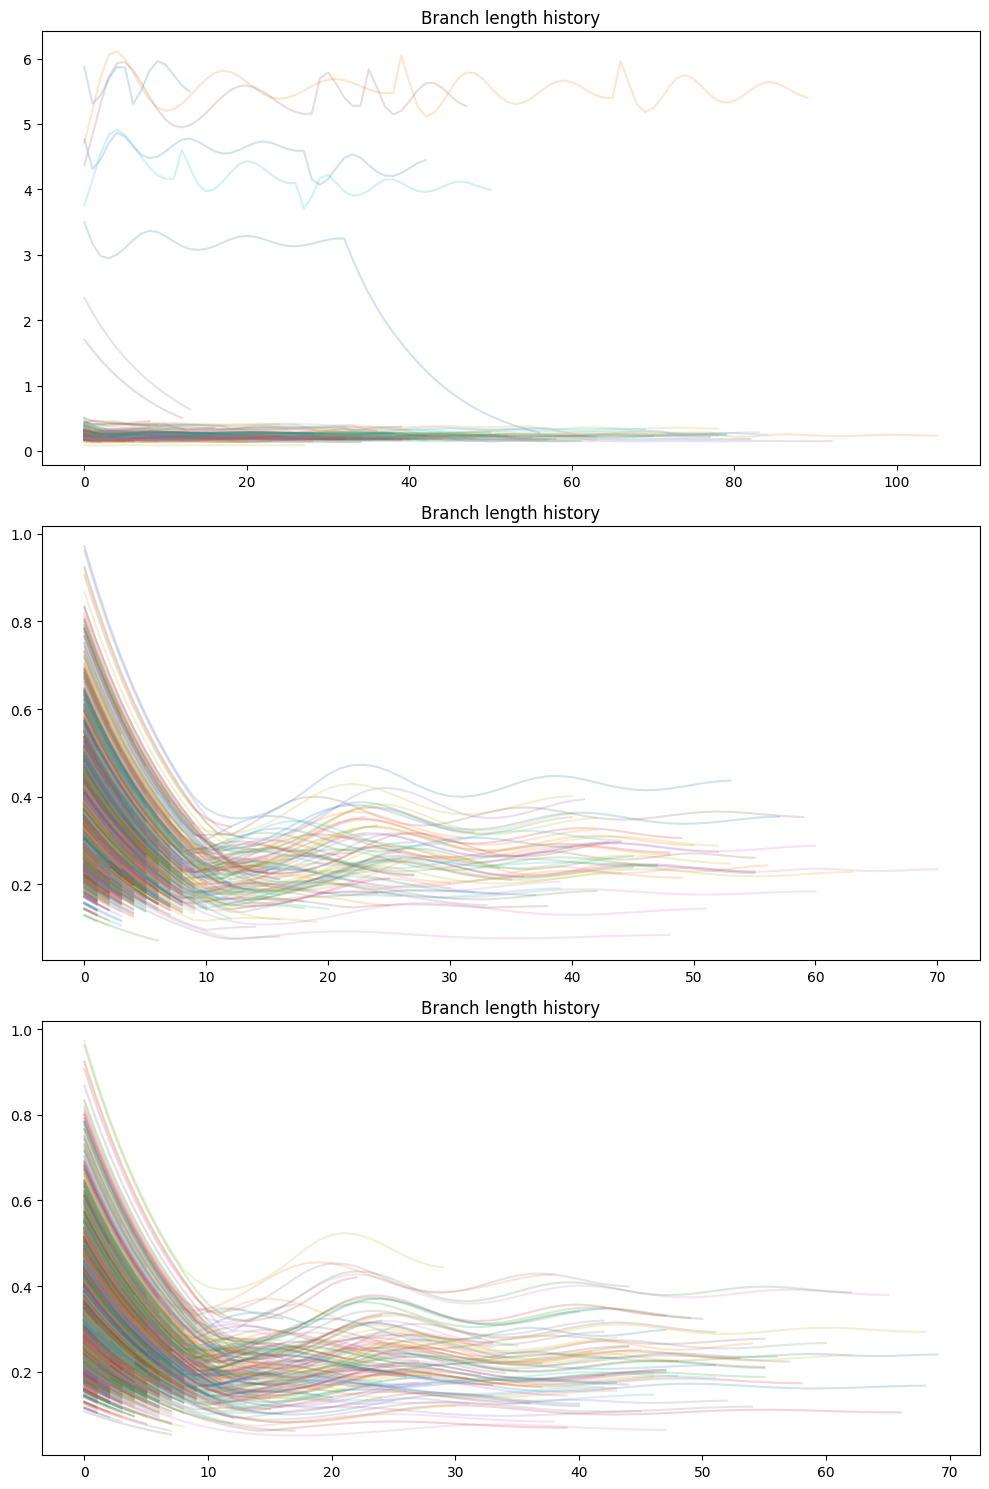

In [5]:
import matplotlib.pyplot as plt

# Assuming big_dfs is your list of DataFrames
n_dfs = len(big_dfs)

# Create a figure with a subplot for each DataFrame, prevent squeezing
fig, axes = plt.subplots(nrows=n_dfs, ncols=1, figsize=(10, 5 * n_dfs), squeeze=False)

for ax, big_df in zip(axes.ravel(), big_dfs):
    for name, group in big_df.groupby("pcp"):
        ax.plot(group["branch_length"].reset_index(drop=True), alpha=0.2)
    ax.set_title("Branch length history")

# Adjust layout
plt.tight_layout()
plt.show()


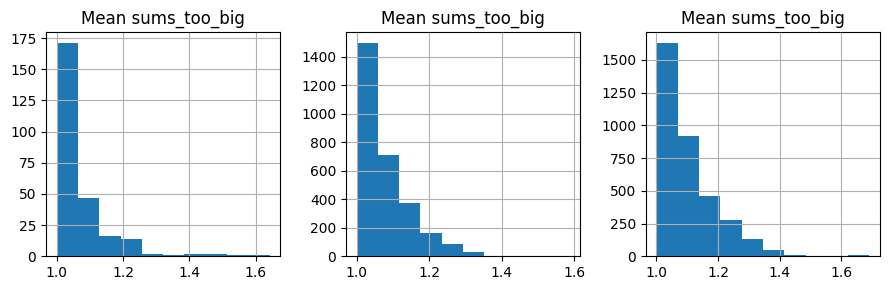

In [6]:
fig, axes = plt.subplots(nrows=1, ncols=n_dfs, figsize=(3*n_dfs, 3), squeeze=False)

for ax, big_df in zip(axes.ravel(), big_dfs):
    big_df.groupby("pcp")["sums_too_big"].mean().hist(ax=ax)
    ax.set_title("Mean sums_too_big")

# Adjust layout
plt.tight_layout()
plt.show()
